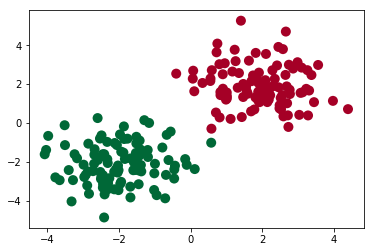

In [36]:
import torch
import matplotlib.pyplot as plt

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, )

# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


In [20]:
#define a nn model
import torch.nn as nn
import torch.nn.functional as F

In [37]:
class Net(nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = nn.Linear(n_feature,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    

In [43]:
net = Net(2,10,2)

In [40]:
import torch.optim as Optimizer

In [54]:
optimizer = Optimizer.SGD(net.parameters(),lr=0.05)
loss_fun = torch.nn.CrossEntropyLoss()
plt.ion()
plt.show()

C:\Users\Lee\Anaconda3\envs\pytorch\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


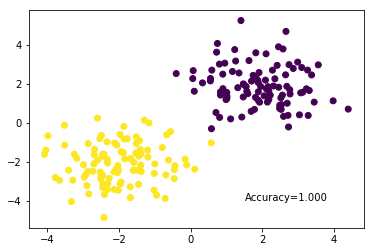

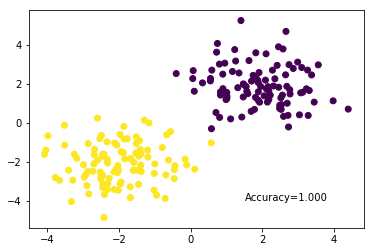

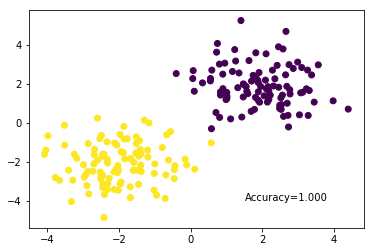

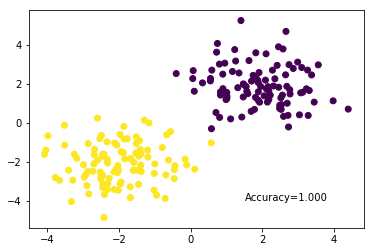

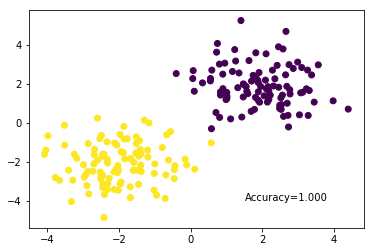

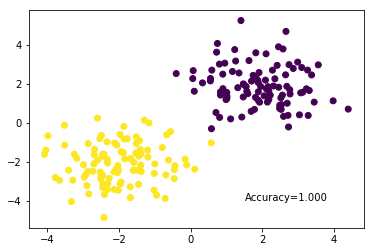

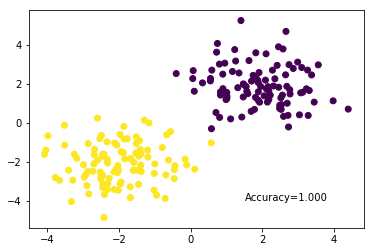

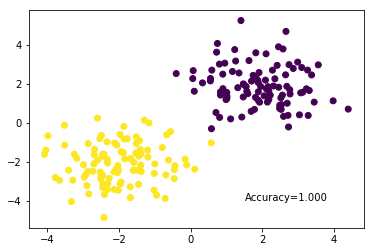

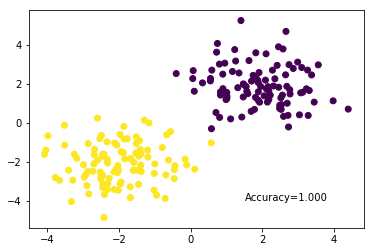

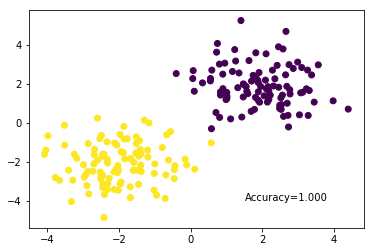

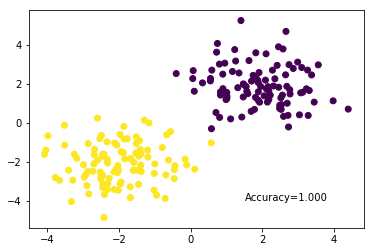

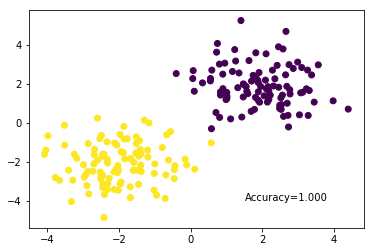

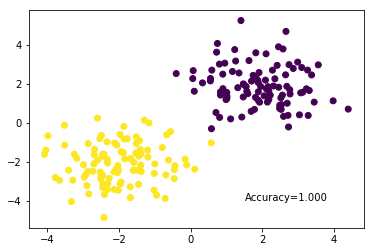

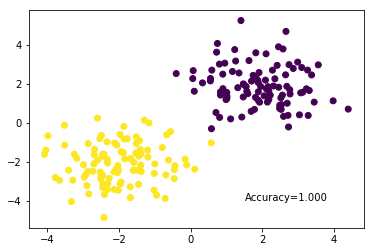

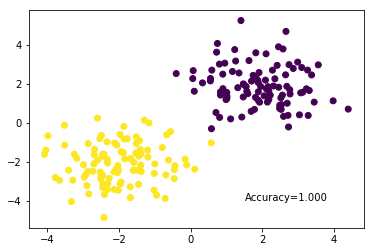

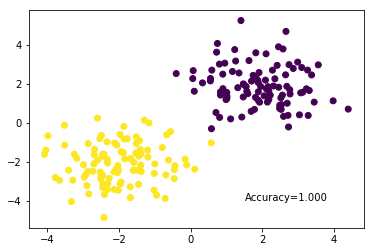

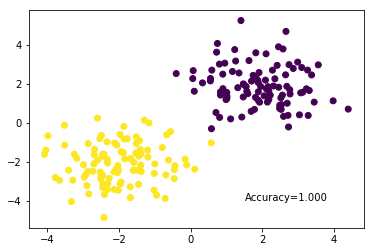

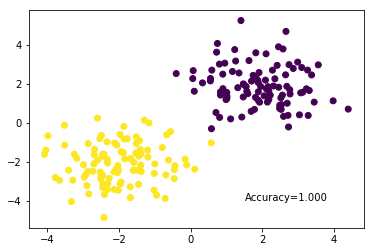

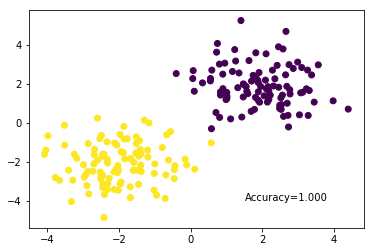

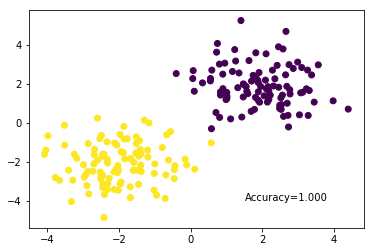

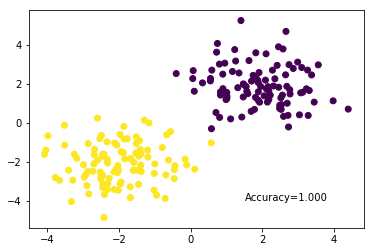

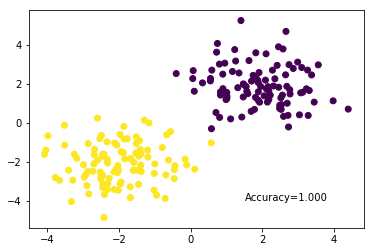

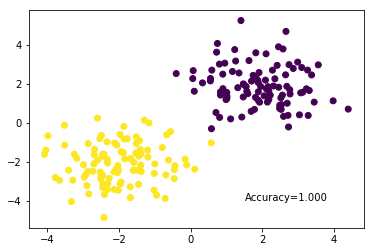

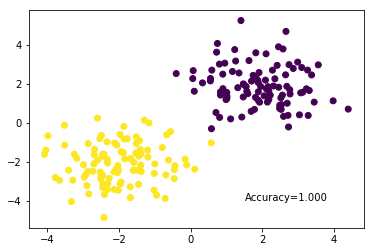

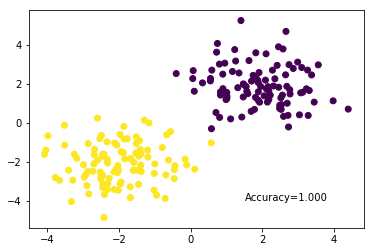

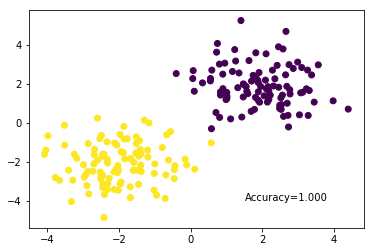

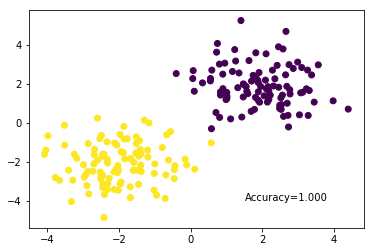

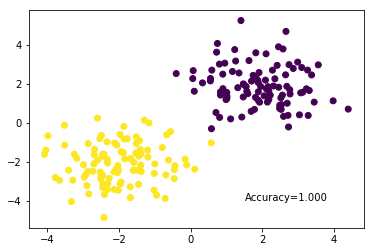

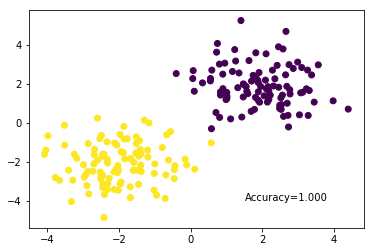

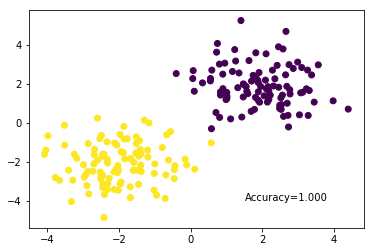

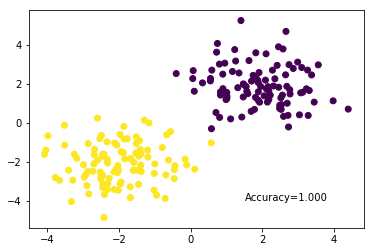

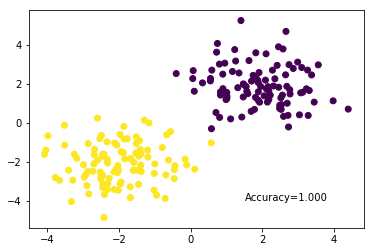

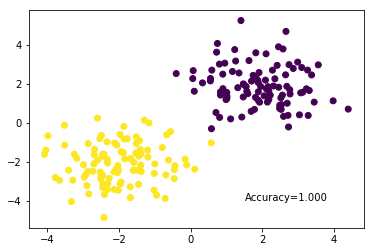

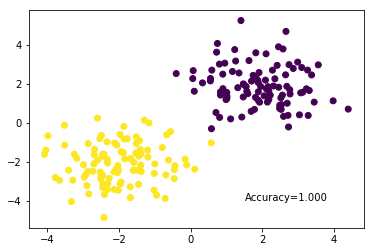

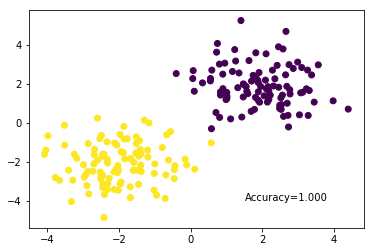

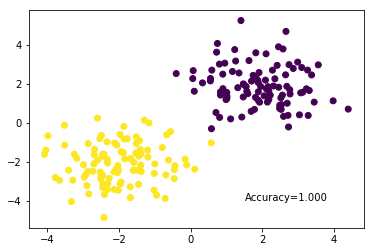

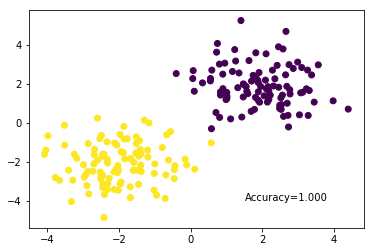

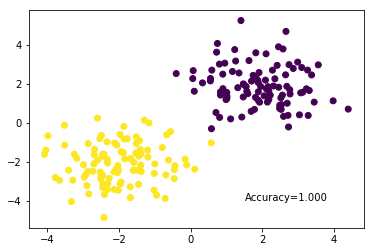

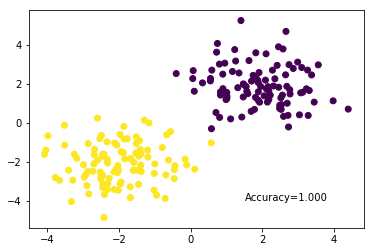

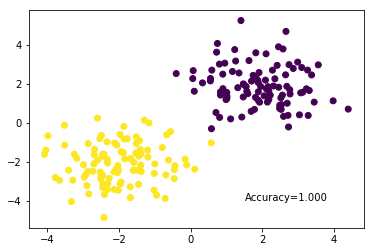

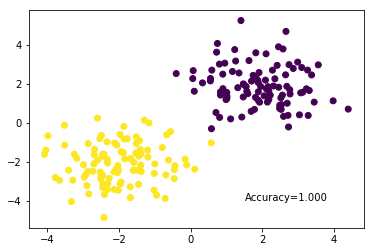

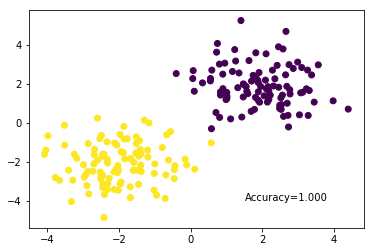

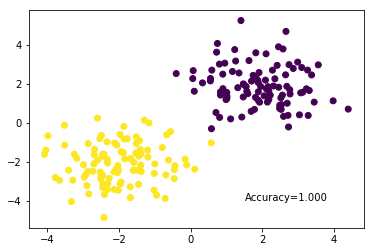

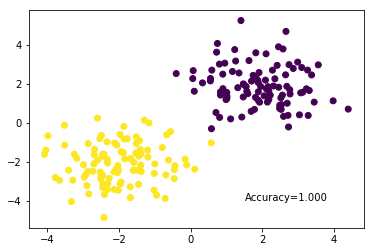

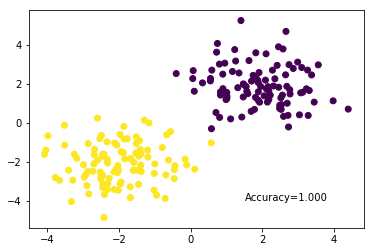

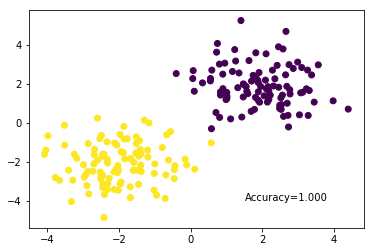

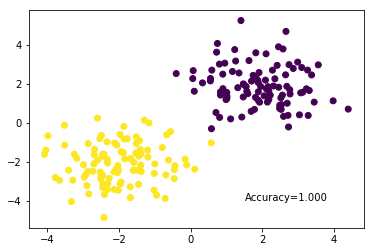

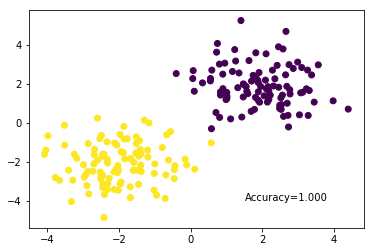

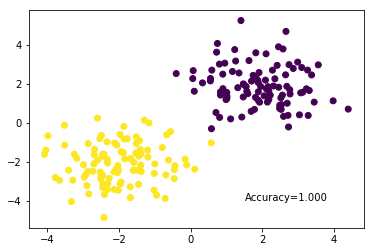

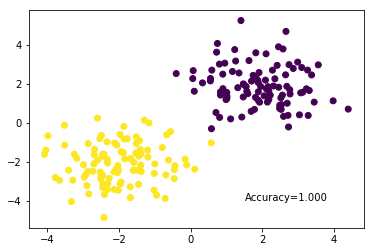

In [55]:
## begin to train the model
for t in range(100):
    out=net(x)
    
    loss = loss_fun(out,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%2 ==0:
        plt.cla()
        prediction = torch.max(F.softmax(out),dim=1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y=y.data.numpy()
        
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y)
        accuracy = sum(pred_y == target_y)/200
        plt.text(1.5,-4,'Accuracy=%.3f' % accuracy)
        plt.pause(0.1)
        